## NEW VISUALIZATIONS

In [1]:
# MODULE IMPORTS ----
#%load_ext autoreload
#%autoreload
# warning settings
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)


# 
print('importing sys')
import sys
print('done importing sys')
import hddm

# Make simulators visible

#sys.path.append('simulators')

# Data management
#import pandas as pd
#import numpy as np
#import pickle

# Plotting
#import matplotlib.pyplot as plt
#import matplotlib
#import seaborn as sns

# Stats functionality
#from statsmodels.distributions.empirical_distribution import ECDF

importing sys
done importing sys


### Generate some Data

In [2]:
# Metadata
nmcmc = 100
model = 'levy'
n_samples = 500
includes = hddm.simulators.model_config[model]['hddm_include'] # Note, this makes sure you include all parameters which is not necessary ! You could also instead include fewer parameters.

In [3]:
# test regressors only False
# add p_outliers to the generator !
data, full_parameter_dict = hddm.simulators.hddm_dataset_generators.simulator_h_c(n_subjects = 5,
                                                                                  n_samples_by_subject = n_samples,
                                                                                  model = model,
                                                                                  p_outlier = 0.00,
                                                                                  conditions = None,
                                                                                  depends_on = None,
                                                                                  regression_models = None,
                                                                                  regression_covariates = None, # need this to make initial covariate matrix from which to use dmatrix (patsy)
                                                                                  group_only_regressors = False,
                                                                                  group_only = None,
                                                                                  fixed_at_default = None)

In [4]:
data

,rt,response,subj_idx,v,a,z,alpha,t
0,0.870156,1.0,0,-0.466827,0.876205,0.366815,1.244936,0.791156
1,1.284154,0.0,0,-0.466827,0.876205,0.366815,1.244936,0.791156
2,0.851156,0.0,0,-0.466827,0.876205,0.366815,1.244936,0.791156
3,1.330153,0.0,0,-0.466827,0.876205,0.366815,1.244936,0.791156
4,1.149155,1.0,0,-0.466827,0.876205,0.366815,1.244936,0.791156
...,...,...,...,...,...,...,...,...
495,0.437289,0.0,4,-0.471726,0.943062,0.399960,1.231020,0.324289
496,1.415283,0.0,4,-0.471726,0.943062,0.399960,1.231020,0.324289
497,1.145282,0.0,4,-0.471726,0.943062,0.399960,1.231020,0.324289
498,0.786286,0.0,4,-0.471726,0.943062,0.399960,1.231020,0.324289


In [ ]:
# Define the HDDM model
hddmnn_model = hddm.HDDMnn(data,
                           informative = False,
                           include = includes,
                           p_outlier = 0.0,
                           w_outlier = 0.01,
                           model = model,
                           network_type = 'torch_mlp')

In [ ]:
# Sample
hddmnn_model.sample(nmcmc,
                    burn = 100)

### Caterpillar Plot

The `caterpillar_plot()` function below displays *parameterwise*, 

-  as a <span style="color:red"> **red** </span> tick-mark the **ground truth**.
-  as a *thin* **black** line the $1 - 99$ percentile range of the posterior distribution
-  as a *thick* **black** line the $5-95$ percentile range of the posterior distribution

Again use the ```help()``` function to learn more.

In [ ]:
# Caterpillar Plot: (Parameters recovered ok?)
hddm.plotting.caterpillar_plot(hddm_model = hddmnn_model,
                               ground_truth_parameter_dict = full_parameter_dict,
                               drop_sd = False,
                               x_limits = [-3, 3])

### Model Plot

The **model plot** is useful to illustrate the behavior of a models pictorially,
including the uncertainty over model parameters embedded in the posterior distribution.

This plot works only for **2-choice** models at this point.

Check out more of it's capabilities with the `help()` function.

<Figure size 640x480 with 0 Axes>

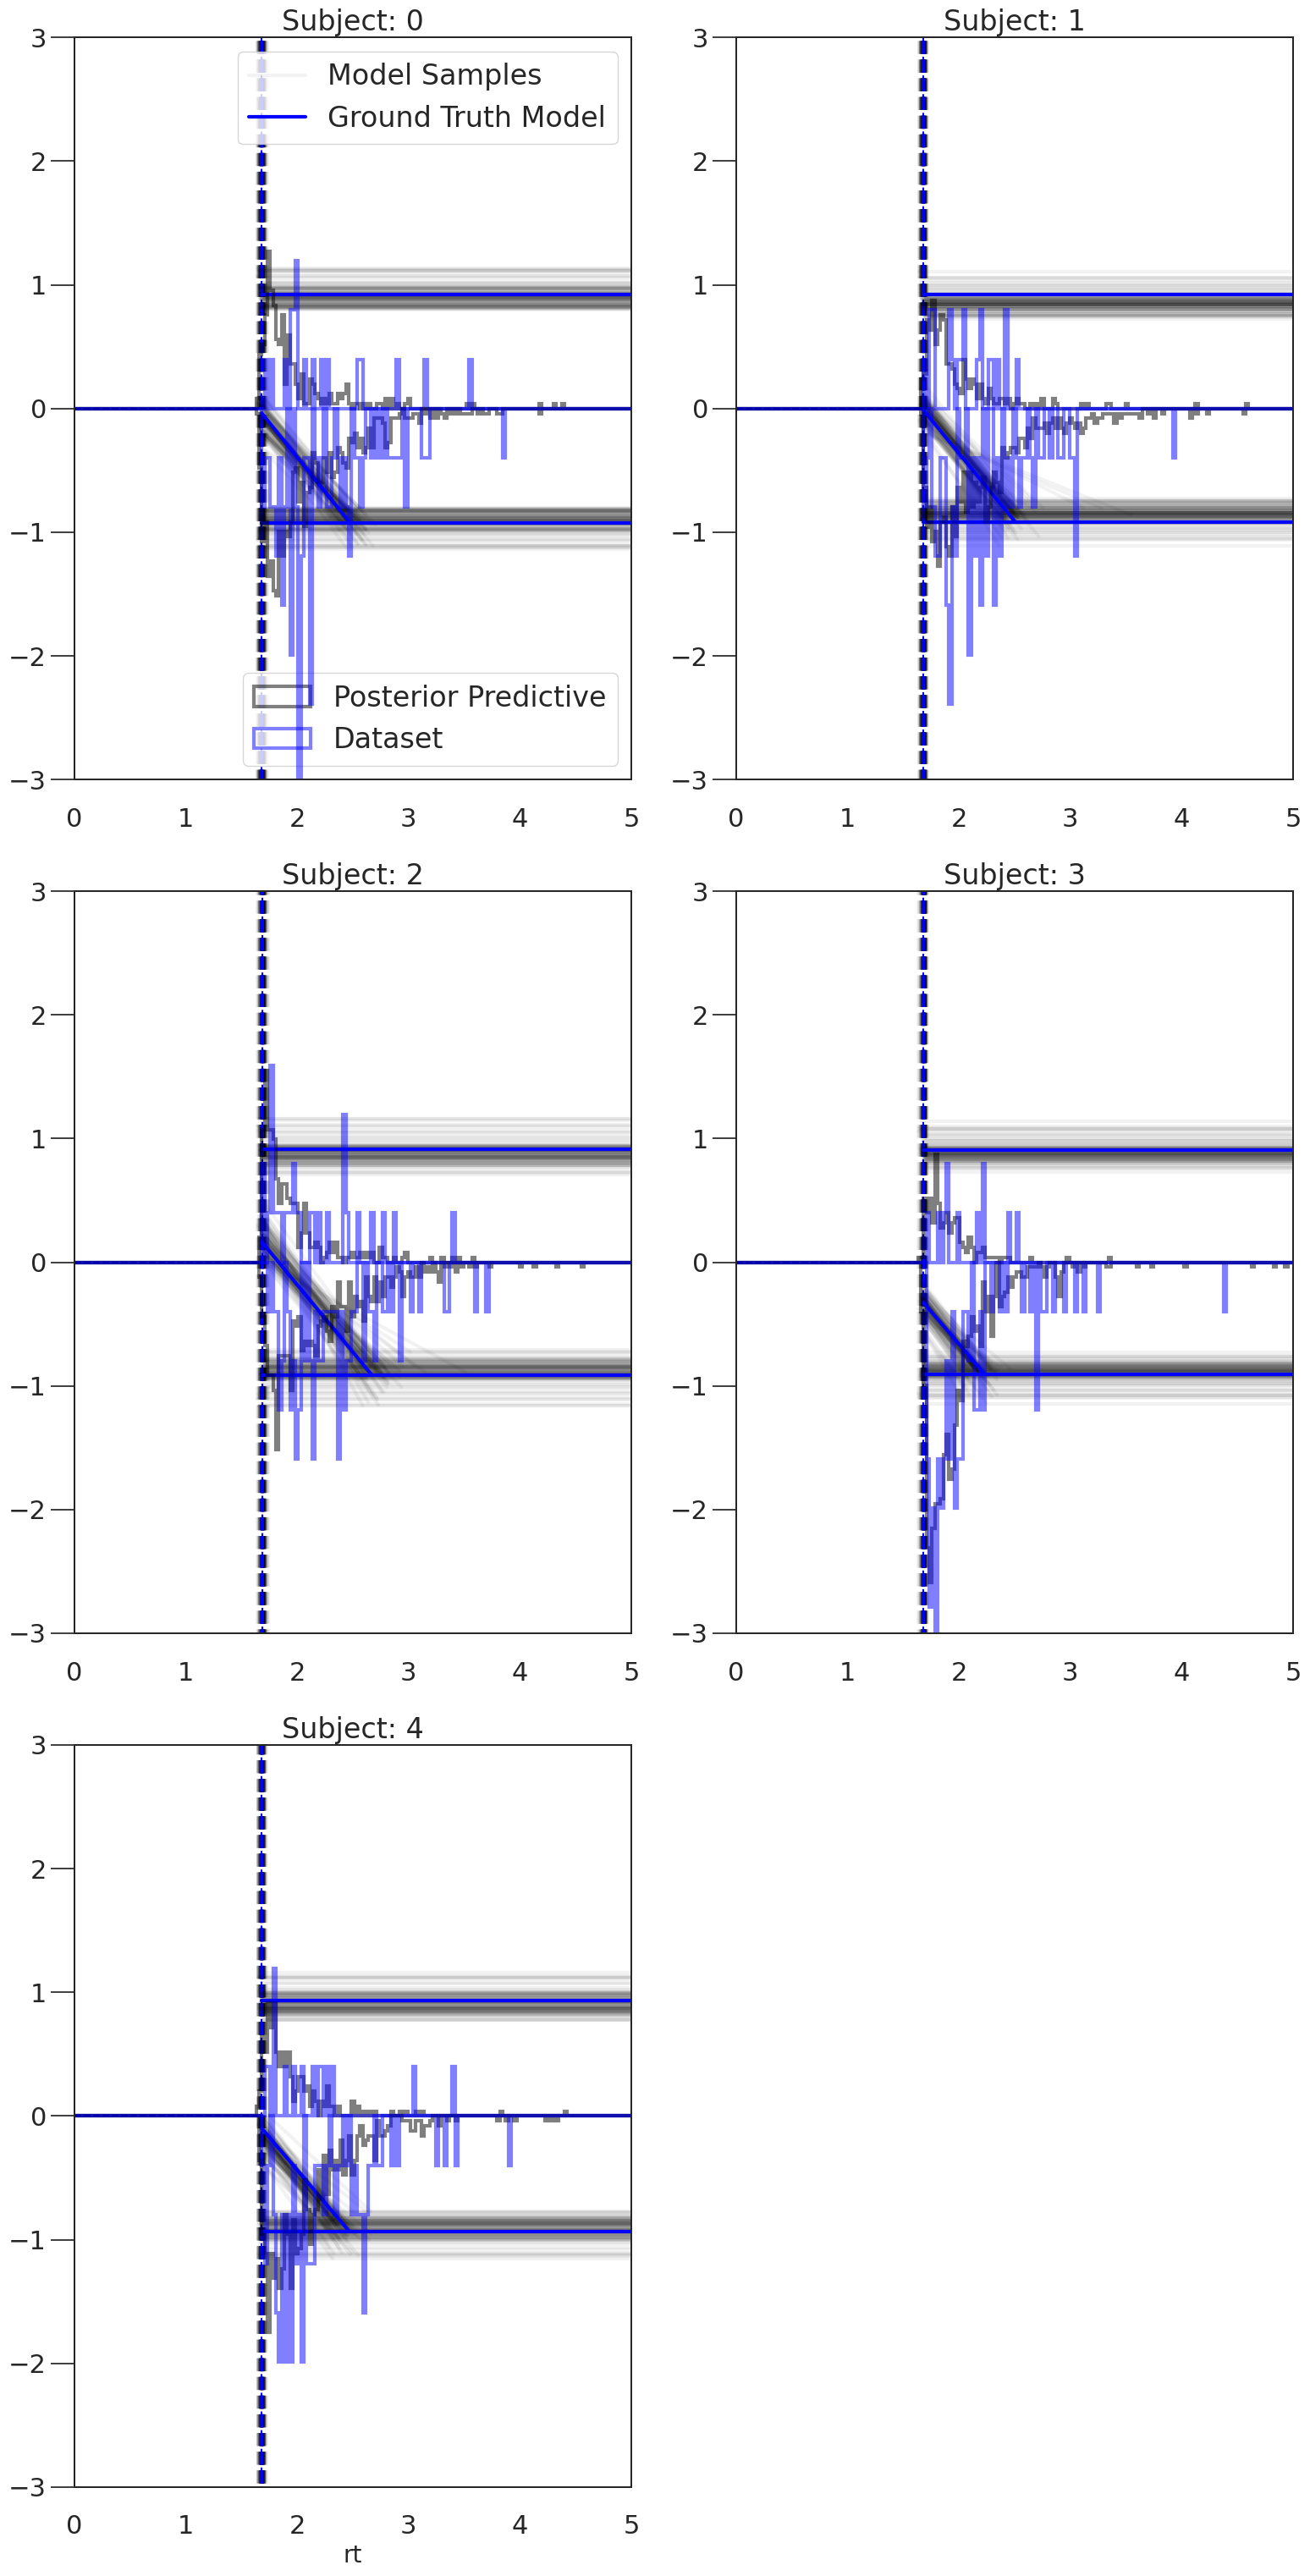

In [8]:
hddm.plotting.model_plot(hddm_model = hddmnn_model,
                         model_ground_truth = model,
                         n_posterior_parameters = 100,
                         scale_x = 0.8,
                         scale_y = 0.6,
                         ylimit = 3,
                         cols = 2)

### Note

Above we used the model plot with *empirical data* (here empirical as in our original simulator data, which we fit the model to) as opposed to specificying. Such *empirical data*, supplied under the `ground_truths_data = ...` argument is signified in <span style="color:blue"> **blue** </span>. This is in contrast to supplying a *ground truth model* under `model_ground_truth = ...`, with corresponding *ground truth parameterization* (potentially multiple for subject and / or condition separated datasets) under `ground_truths_parameters = ...`, where the `model_plot()` will simulate data for these on the fly. Empirical data doesn't have a *true* model of course, so we *don't* see a <span style="color:blue"> **blue** </span> model caricature here, but simply our posterior model parameterizations.

### Posterior Pair Plot

In [7]:
hddmnn_model.model

'levy'

In [ ]:
# import ipdb
# ipdb.set_trace()
out = hddm.plotting.posterior_pair_plot(hddm_model = hddmnn_model,
                                  model_ground_truth = model,
                                  axes_limits = 'samples',
                                  height = 2,
                                  aspect_ratio = 1,
                                  n_subsample = 50,
                                  )

In [10]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
out_test = pd.DataFrame(np.zeros((100, 3)), columns = ['a', 'b', 'c'])

In [12]:
type(out_test['a'])

pandas.core.series.Series

In [13]:
type(out['v_subj.4'])

pandas.core.series.Series

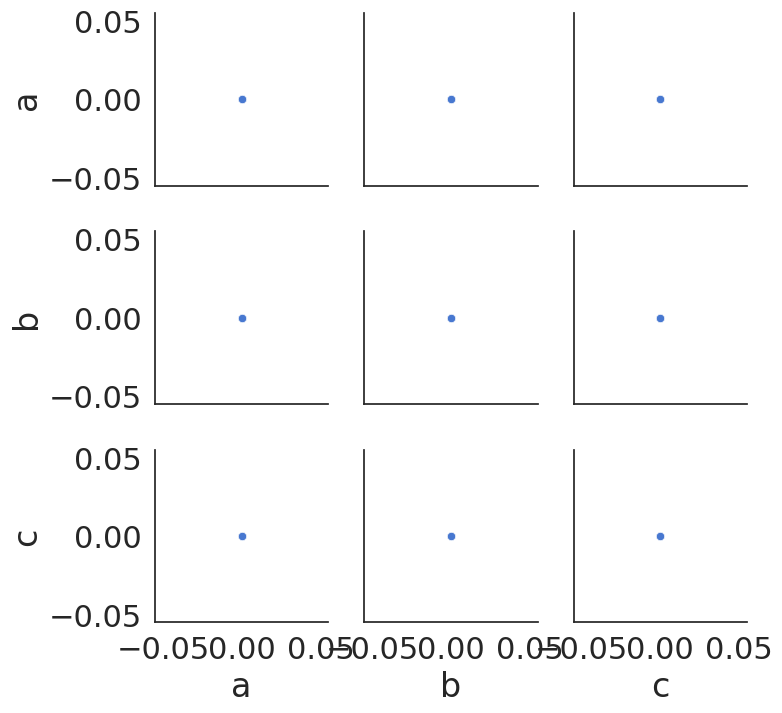

In [14]:
g = sns.PairGrid(out_test)
g.map(sns.scatterplot)
plt.show()
#plt.show()

In [11]:
hddmnn_model.get_traces().iloc[:100, :5]

,v,v_std,v_subj.0,v_subj.1,v_subj.2
0,2.091059,0.986480,1.883541,1.838745,2.232326
1,1.046776,0.820524,1.913237,1.795022,2.368046
2,1.683574,0.904572,1.823230,2.009660,2.166889
3,1.415538,0.752127,1.723619,2.035067,2.211711
4,1.622937,1.478275,1.798047,2.071635,2.145426
...,...,...,...,...,...
95,2.835344,1.444035,2.278327,1.951409,2.581600
96,1.973945,0.945848,2.080191,1.997693,2.558694
97,1.698362,0.405873,1.974859,2.146379,2.532396
98,2.126902,0.441767,1.930740,2.071578,2.400873


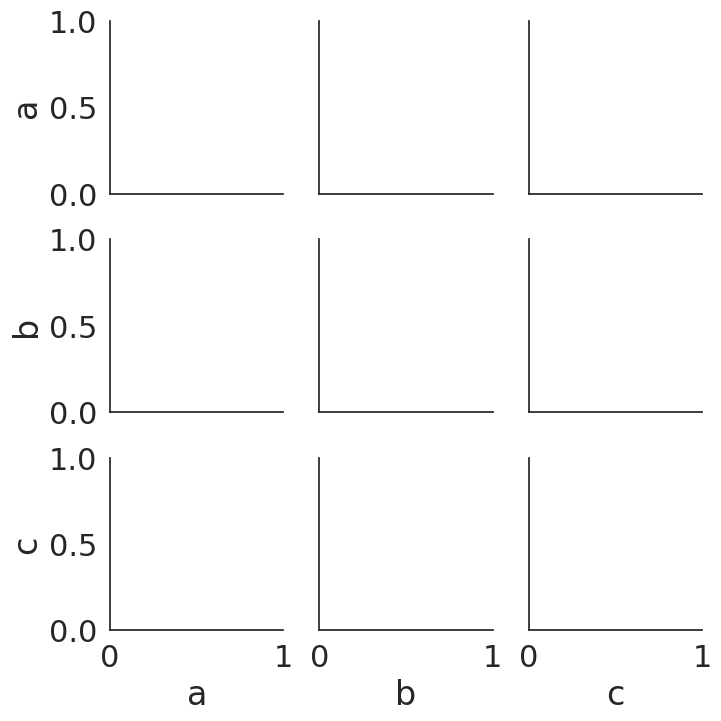

In [28]:
import numpy as np
import pandas as pd
g = sns.PairGrid(pd.DataFrame(np.random.normal(size = (1000, 3)), columns = ['a', 'b', 'c']), )
plt.show()

In [27]:
np.random.normal(size = (100, 3)).shape

(100, 3)